In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.stats as stats 
import os

directory = 'C:/Users/youal/Documents/GitHub/albertkyou.github.io/Cubing/cstimerstats'
df = []

for filename in os.listdir(directory):
    if filename.startswith('csT'):
        df.append(pd.read_csv(filename,';')['P.1'])


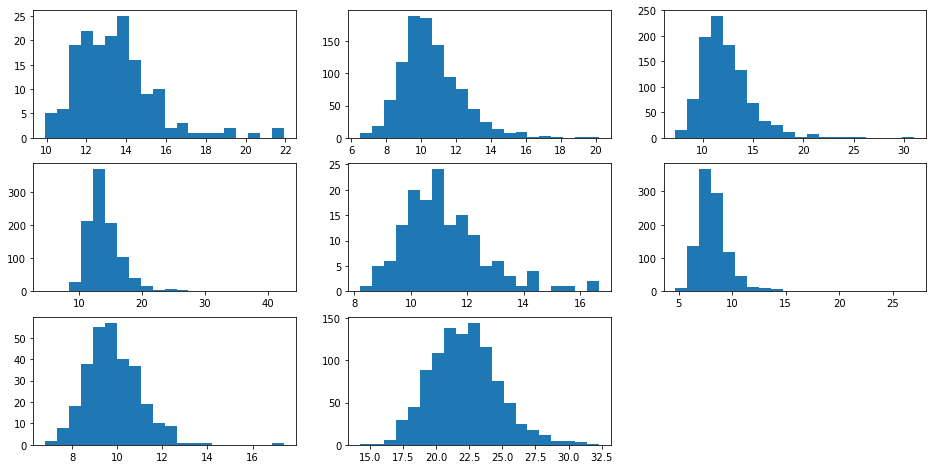

In [14]:
plt.figure(figsize=(16,8))
for i in range(len(df)):

    if len(df[i])>1000:
        plt.subplot(3,3,i+1)
        plt.hist(df[i][-1000:].astype(float),bins=20)    
    else:
        plt.subplot(3,3,i+1)
        plt.hist(df[i],bins=20)    


Text(0, 0.5, 'standard deviation (s)')

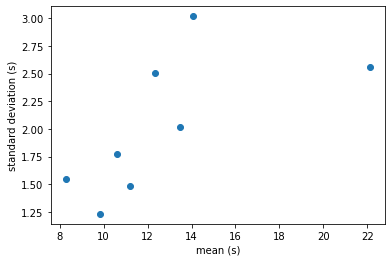

In [24]:
# is there truly a correlation between mean times and std?
mean = []
std = []
for i in range(len(df)):
    if len(df[i])>1000:
        mean.append(np.mean(df[i][-1000:].astype(float)))
        std.append(np.std(df[i][-1000:].astype(float)))
    else:
        mean.append(np.mean(df[i].astype(float)))
        std.append(np.std(df[i].astype(float)))

plt.plot(mean, std, 'o')
plt.xlabel('mean (s)')
plt.ylabel('standard deviation (s)')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     4.266
Date:                Sun, 22 Mar 2020   Prob (F-statistic):             0.0844
Time:                        19:07:27   Log-Likelihood:                -4.8664
No. Observations:                   8   AIC:                             13.73
Df Residuals:                       6   BIC:                             13.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8154      0.610      1.337      0.230      -0.677       2.308
x1             0.0944      0.046      2.065      0.084      -0.017       0.206
==============================================================================
Omnibus:                        2.049   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.019
Skew:                           0.831   Prob(JB):                        0.601
Kurtosis:                       2.460   Cond. No.                         45.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

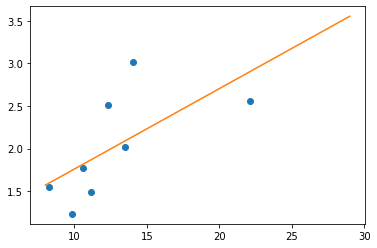

In [45]:
# find regression line between mean and std

import statsmodels.api as sm 

meanx = sm.add_constant(mean)
model = sm.OLS(std,meanx).fit()


plt.plot(mean,std,'o')
x = np.arange(8,30)
y = x*model.params[1] + model.params[0]
plt.plot(x,y)

model.summary()